In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [6]:
z = pd.read_csv("C:\\Users\\bramhad\\OneDrive - Konecranes Plc\\Desktop\\Data Science\\ExcelR\\Assignments\\11_Decision Tree\\Fraud_check.csv")
z.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


### Adding a loop for a income less than 30000 as risky and more than 30000 as a good and then checking the dataframe

In [7]:
for i in range(len(z['Taxable.Income'])):
    if z['Taxable.Income'][i] <= 30000:
        z['Taxable.Income'][i] = 'risky'
    else:
        z['Taxable.Income'][i] = 'good'

<ipython-input-7-f4e48e0f277a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Taxable.Income'][i] = 'good'
C:\Users\bramhad\AppData\Local\Continnum\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-7-f4e48e0f277a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Taxable.Income'][i] = 'risky'


In [8]:
z.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


In [9]:
cn = list(z.columns)
cn

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [10]:
z = pd.get_dummies(z)
z

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Taxable.Income_good,Taxable.Income_risky,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,1,0,0,1
1,134075,18,0,1,1,0,0,1,0,0,1
2,160205,30,1,0,0,1,0,1,0,0,1
3,193264,15,0,1,0,0,1,1,0,0,1
4,27533,28,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,1,0,0,1
596,55369,2,0,1,1,0,0,1,0,0,1
597,154058,0,1,0,1,0,0,1,0,0,1
598,180083,17,0,1,0,1,0,1,0,1,0


In [11]:
p= z.drop('Marital.Status_Single', axis=1)
q= p.drop('Marital.Status_Divorced', axis=1)
r= q.drop('Undergrad_NO', axis=1)
s= r.drop('Urban_NO',axis=1)

In [12]:
m = s.drop('Taxable.Income_good', axis=1)
m

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Taxable.Income_risky,Urban_YES
0,50047,10,0,0,0,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,0,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [13]:
z=m.rename({'Undergrad_YES':'Undergrad','Marital.Status_Married':'Marital.Status','Urban_YES':'Urban','Taxable.Income_risky':'Taxable.Income'}, axis=1)
z

,City.Population,Work.Experience,Undergrad,Marital.Status,Taxable.Income,Urban
0,50047,10,0,0,0,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,0,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [44]:
x=z.iloc[:, [0,1,2,3,5]]
y=z.iloc[:,4]

In [45]:
x,y

(     City.Population  Work.Experience  Undergrad  Marital.Status  Urban
 0              50047               10          0               0      1
 1             134075               18          1               0      1
 2             160205               30          0               1      1
 3             193264               15          1               0      1
 4              27533               28          0               1      0
 ..               ...              ...        ...             ...    ...
 595            39492                7          1               0      1
 596            55369                2          1               0      1
 597           154058                0          0               0      1
 598           180083               17          1               1      0
 599           158137               16          0               0      0
 
 [600 rows x 5 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 595    0
 596    0
 597    0
 598   

In [46]:
x

,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,50047,10,0,0,1
1,134075,18,1,0,1
2,160205,30,0,1,1
3,193264,15,1,0,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,1
596,55369,2,1,0,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [24]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: uint8

In [25]:
# Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=50)

 # Building Decision Tree Classifier (C5.0)

In [26]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(111.60000000000001, 190.26, 'X[0] <= 28297.0\nentropy = 0.75\nsamples = 480\nvalue = [377, 103]'),
 Text(55.800000000000004, 135.9, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(167.4, 135.9, 'X[0] <= 28452.5\nentropy = 0.755\nsamples = 474\nvalue = [371, 103]'),
 Text(111.60000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 81.53999999999999, 'X[0] <= 28990.0\nentropy = 0.752\nsamples = 473\nvalue = [371, 102]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(279.0, 27.180000000000007, 'entropy = 0.758\nsamples = 466\nvalue = [364, 102]')]

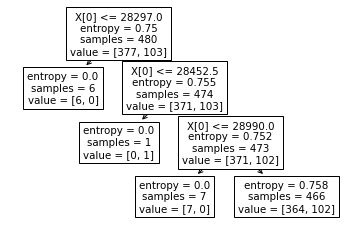

In [27]:
#PLot the decision tree
tree.plot_tree(model)

In [28]:
y_train.value_counts()

0    377
1    103
Name: Taxable.Income, dtype: int64

In [30]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    119
1      1
dtype: int64

In [31]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [32]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Taxable.Income,,
0,98,1
1,21,0


In [33]:
# Accuracy 
np.mean(preds==y_test)

0.8166666666666667

# Building Decision Tree Classifier (CART) using Gini Criteria

In [34]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [35]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [60]:
#Prediction and computing the accuracy
pred = model_gini.predict(x_test)
np.mean(pred==y_test)

0.8055555555555556

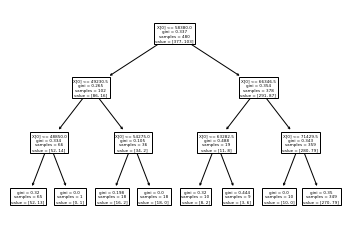

In [61]:
tree.plot_tree(model_gini);

# Post pruning decision trees with cost complexity pruning

In [64]:
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [65]:
ccp_alphas

array([0.        , 0.00154611, 0.00210519, 0.00327805, 0.00337205,
       0.00346142])

In [66]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 47 with ccp_alpha: 0.0034614175042698148


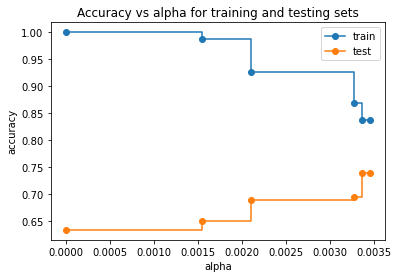

In [67]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [68]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.00345)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00345, random_state=0)

In [69]:
pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7388888888888889

[Text(194.6511627906977, 528.5, 'X[1] <= 6.5\ngini = 0.331\nsamples = 420\nvalue = [332, 88]'),
 Text(77.86046511627907, 498.3, 'X[0] <= 193594.0\ngini = 0.23\nsamples = 83\nvalue = [72, 11]'),
 Text(38.93023255813954, 468.1, 'gini = 0.202\nsamples = 79\nvalue = [70, 9]'),
 Text(116.79069767441861, 468.1, 'X[1] <= 2.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(77.86046511627907, 437.9, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(155.72093023255815, 437.9, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(311.4418604651163, 498.3, 'X[1] <= 24.5\ngini = 0.353\nsamples = 337\nvalue = [260, 77]'),
 Text(272.51162790697674, 468.1, 'X[0] <= 45514.0\ngini = 0.383\nsamples = 236\nvalue = [175, 61]'),
 Text(233.58139534883722, 437.9, 'gini = 0.48\nsamples = 30\nvalue = [18, 12]'),
 Text(311.4418604651163, 437.9, 'X[0] <= 198872.5\ngini = 0.363\nsamples = 206\nvalue = [157, 49]'),
 Text(272.51162790697674, 407.70000000000005, 'X[0] <= 52405.5\ngini = 0.359\nsamples = 205\nvalue = [1

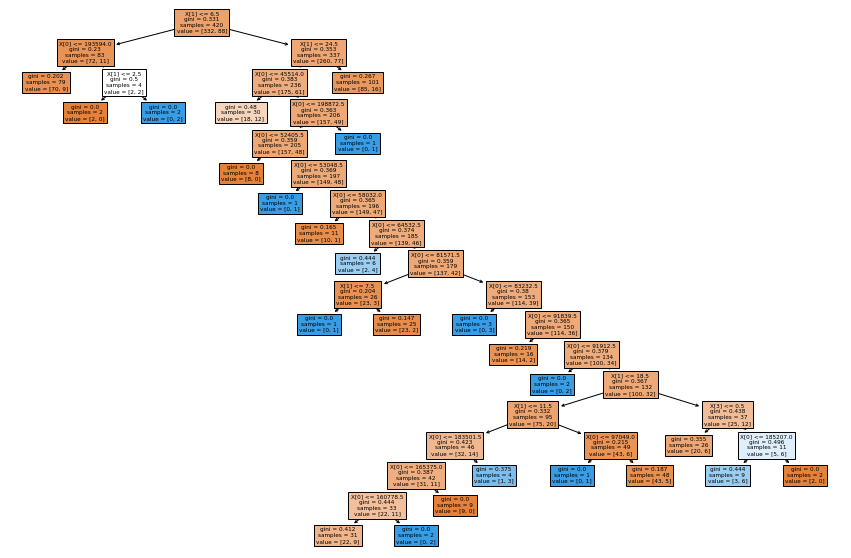

In [70]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

# Decision Tree Regression



In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)

In [51]:
model = DecisionTreeRegressor(random_state=50, ccp_alpha=0.00345)
model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.00345, random_state=50)

In [53]:
#Find the accuracy
model.score(x_test, y_test)

-0.0005668934240359302

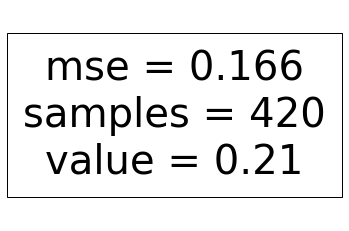

In [54]:
tree.plot_tree(model);

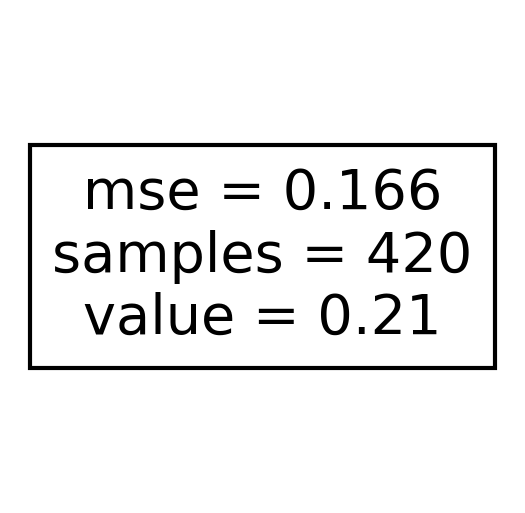

In [59]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Taxable.Income']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model,feature_names = fn, class_names= cn, filled = True);